In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
!ls /kaggle/input/face-mask-dataset/data/with_mask | wc -l

3725


In [3]:
!ls /kaggle/input/face-mask-dataset/data/without_mask | wc -l

3828


In [17]:
!pip install tensorflow

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt

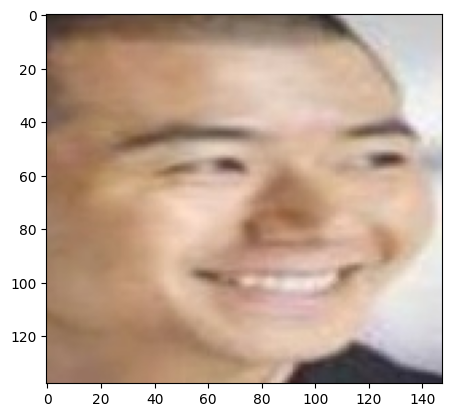

In [19]:
img = plt.imread('/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2.jpg')
plt.imshow(img)
plt.show()

In [20]:
img_size = 100

In [33]:
import cv2

CATEGORIES = ['without_mask', 'with_mask']
img_size = 100
training_data = []
Datadir = r'/kaggle/input/face-mask-dataset/data/'

for i in CATEGORIES:
    path = os.path.join(Datadir, i)
    class_num = CATEGORIES.index(i)

    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_size, img_size))
            training_data.append([new_array, class_num])
            
        except Exception as e:
            pass

In [34]:
len(training_data)

7553

In [35]:
import random
random.shuffle(training_data)

In [36]:
training_data[:1]

[[array([[  3,   4,   5, ..., 172, 172, 172],
         [  4,   4,   6, ..., 172, 172, 172],
         [  5,   5,   7, ..., 173, 173, 173],
         ...,
         [124,  61,  92, ..., 213, 211, 212],
         [ 71,  66,  68, ..., 213, 212, 212],
         [ 65,  58,  63, ..., 213, 212, 212]], dtype=uint8),
  0]]

In [37]:
x = []
y = []

for f, yi in training_data:
    x.append(f)
    y.append(yi)

x = np.array(x)
y =np.array(y)

In [38]:
y[:5]

array([0, 1, 0, 1, 1])

In [39]:
x.shape

(7553, 100, 100)

In [40]:
x = x.reshape(-1, img_size, img_size, 1)
x.shape

(7553, 100, 100, 1)

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state=42)

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten

model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=x.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,276,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,646,721 (13.91 MB)

 Trainable params: 3,646,721 (13.91 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [50]:
model.fit(x_train, y_train, batch_size=32, epochs=25, validation_data=(x_val, y_val))

Epoch 1/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9585 - loss: 0.1108 - val_accuracy: 0.9298 - val_loss: 0.2035
Epoch 2/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9680 - loss: 0.0830 - val_accuracy: 0.9193 - val_loss: 0.2286
Epoch 3/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9697 - loss: 0.0822 - val_accuracy: 0.9107 - val_loss: 0.2563
Epoch 4/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9696 - loss: 0.0755 - val_accuracy: 0.8968 - val_loss: 0.2755
Epoch 5/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9736 - loss: 0.0673 - val_accuracy: 0.9246 - val_loss: 0.2264
Epoch 6/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9693 - loss: 0.0806 - val_accuracy: 0.9212 - val_loss: 0.2301
Epoch 7/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9751 - loss: 0.0744 - val_accuracy: 0.8987 - val_loss: 0.2884
Epoch 8/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9623 - loss: 0.0911 - val_accu

In [52]:
model.save(r'face_mask_detector.h5')

In [51]:
loss, accuracy = model.evaluate(x_val, y_val)
print(f"Accuracy: {accuracy:.4f}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9136 - loss: 0.3193
Accuracy: 0.9100
